In [1]:
import random
import os
import numpy as np
import json
import corner
import random

import pandas as pd
import datetime
import scipy
import matplotlib.dates as mdates
import matplotlib
import math
import xarray as xr
import emcee
import matplotlib.pyplot as plt
import datetime

from covid19model.optimization import objective_fcns,pso
from covid19model.models import models
from covid19model.models.utils import draw_sample_COVID19_SEIRD_google
from covid19model.models.time_dependant_parameter_fncs import google_lockdown, ramp_fun, contact_matrix
from covid19model.data import google
from covid19model.data import sciensano
from covid19model.data import model_parameters
from covid19model.visualization.output import population_status, infected, _apply_tick_locator 
from covid19model.visualization.optimization import plot_fit, traceplot


# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
spatial_unit = 'BE_6_prev_faster'
date = '2020-12-08'

In [11]:
results_folder = "../../results/calibrations/COVID19_SEIRD/national/backends/"
filename = spatial_unit+'_'+date
backend = emcee.backends.HDFBackend(results_folder+filename)

In [12]:
sampler = backend

In [13]:
ndim=10

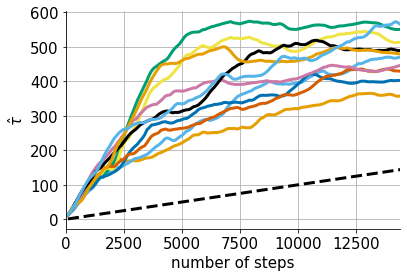

In [22]:
# Checken waar stopcriterium zit
chains = sampler.get_chain()
step_autocorr = 100
tau_vect = np.empty((len(chains)//step_autocorr,ndim))
index = 0
for i in range(step_autocorr, len(chains), step_autocorr):
    tau_vect[index] = emcee.autocorr.integrated_time(chains[:i], tol = 0)
    index += 1
n = step_autocorr * np.arange(1, index + 1)
plt.plot(n, n / step_autocorr, "--k")
plt.plot(n, tau_vect)
plt.xlim(0, n.max())
plt.xlabel("number of steps")
plt.ylabel(r"$\hat{\tau}$");

In [23]:
n

array([  100,   200,   300,   400,   500,   600,   700,   800,   900,
        1000,  1100,  1200,  1300,  1400,  1500,  1600,  1700,  1800,
        1900,  2000,  2100,  2200,  2300,  2400,  2500,  2600,  2700,
        2800,  2900,  3000,  3100,  3200,  3300,  3400,  3500,  3600,
        3700,  3800,  3900,  4000,  4100,  4200,  4300,  4400,  4500,
        4600,  4700,  4800,  4900,  5000,  5100,  5200,  5300,  5400,
        5500,  5600,  5700,  5800,  5900,  6000,  6100,  6200,  6300,
        6400,  6500,  6600,  6700,  6800,  6900,  7000,  7100,  7200,
        7300,  7400,  7500,  7600,  7700,  7800,  7900,  8000,  8100,
        8200,  8300,  8400,  8500,  8600,  8700,  8800,  8900,  9000,
        9100,  9200,  9300,  9400,  9500,  9600,  9700,  9800,  9900,
       10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800,
       10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700,
       11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600,
       12700, 12800,

In [21]:
len(chains)//step_autocorr

143

In [20]:
len(chains)

14327

In [19]:
index = 0
for i in range(step_autocorr, len(chains), step_autocorr):
    print(i, index)
    index += 1

100 0
200 1
300 2
400 3
500 4
600 5
700 6
800 7
900 8
1000 9
1100 10
1200 11
1300 12
1400 13
1500 14
1600 15
1700 16
1800 17
1900 18
2000 19
2100 20
2200 21
2300 22
2400 23
2500 24
2600 25
2700 26
2800 27
2900 28
3000 29
3100 30
3200 31
3300 32
3400 33
3500 34
3600 35
3700 36
3800 37
3900 38
4000 39
4100 40
4200 41
4300 42
4400 43
4500 44
4600 45
4700 46
4800 47
4900 48
5000 49
5100 50
5200 51
5300 52
5400 53
5500 54
5600 55
5700 56
5800 57
5900 58
6000 59
6100 60
6200 61
6300 62
6400 63
6500 64
6600 65
6700 66
6800 67
6900 68
7000 69
7100 70
7200 71
7300 72
7400 73
7500 74
7600 75
7700 76
7800 77
7900 78
8000 79
8100 80
8200 81
8300 82
8400 83
8500 84
8600 85
8700 86
8800 87
8900 88
9000 89
9100 90
9200 91
9300 92
9400 93
9500 94
9600 95
9700 96
9800 97
9900 98
10000 99
10100 100
10200 101
10300 102
10400 103
10500 104
10600 105
10700 106
10800 107
10900 108
11000 109
11100 110
11200 111
11300 112
11400 113
11500 114
11600 115
11700 116
11800 117
11900 118
12000 119
12100 120
12200 12